<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1505547822.py:15: SyntaxWarning: invalid escape sequence '\s'
  samples = pd.read_csv(samples_file, encoding='utf-8', on_bad_lines='warn', sep='\s+', engine='python')
/tmp/ipython-input-1505547822.py:19: SyntaxWarning: invalid escape sequence '\s'
  samples = pd.read_csv(samples_file, encoding='latin1', on_bad_lines='warn', sep='\s+', engine='python')


🧬 Starting RNA-seq Quality Control Analysis
📊 Loaded 6 samples with UTF-8 encoding
✅ Found conditions: ['control', 'treatment']
📈 Plot saved: results/sample_distribution.png

📋 Analysis Summary:
   Total samples: 6
   Conditions: 2
   Batches: 2
✅ Quality control analysis completed!


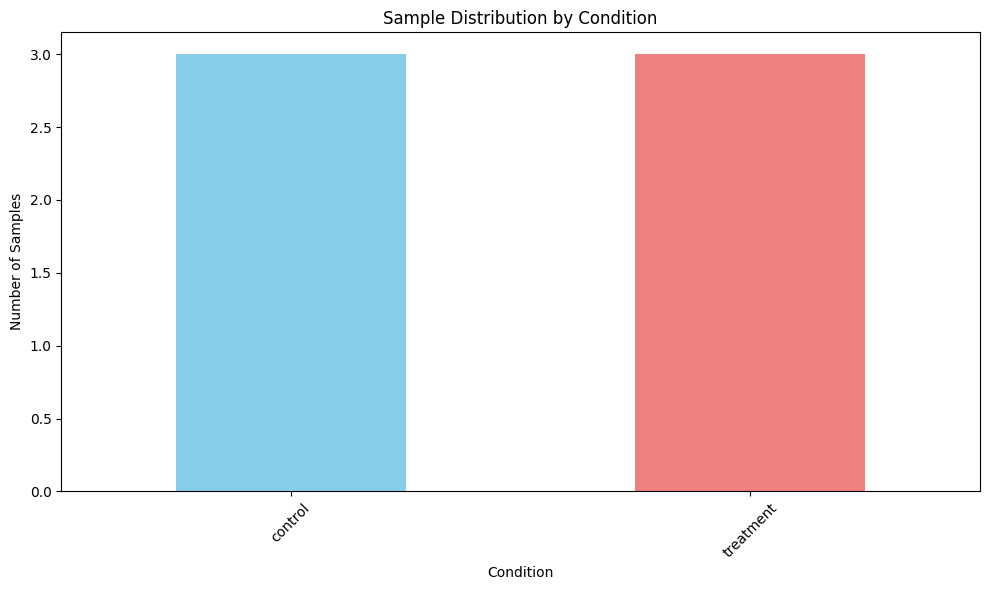

In [11]:
#!/usr/bin/env python3
"""
RNA-seq Quality Control Analysis

This script analyzes sample metadata and performs basic QC checks.
"""

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def load_samples(samples_file):
    """Load and validate sample metadata"""
    try:
        samples = pd.read_csv(samples_file, encoding='utf-8', on_bad_lines='warn', sep='\s+', engine='python')
        print(f"📊 Loaded {len(samples)} samples with UTF-8 encoding")
    except UnicodeDecodeError:
        try:
            samples = pd.read_csv(samples_file, encoding='latin1', on_bad_lines='warn', sep='\s+', engine='python')
            print(f"📊 Loaded {len(samples)} samples with latin1 encoding")
        except Exception as e:
            print(f"❌ Error loading samples file: {e}")
            return None

    # Check for required columns
    required_cols = ['sample_id', 'condition', 'replicate']
    missing_cols = [col for col in required_cols if col not in samples.columns]

    if missing_cols:
        print(f"❌ Missing required columns: {missing_cols}")
        return None

    print(f"✅ Found conditions: {list(samples['condition'].unique())}")
    return samples

def create_sample_overview(samples, output_dir="results"):
    """Create overview plots of sample distribution"""
    Path(output_dir).mkdir(exist_ok=True)

    # Sample counts by condition
    condition_counts = samples['condition'].value_counts()

    plt.figure(figsize=(10, 6))
    condition_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Sample Distribution by Condition')
    plt.ylabel('Number of Samples')
    plt.xlabel('Condition')
    plt.xticks(rotation=45)
    plt.tight_layout()

    output_file = Path(output_dir) / "sample_distribution.png"
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"📈 Plot saved: {output_file}")

    return condition_counts

def main():
    """Main analysis function"""
    print("🧬 Starting RNA-seq Quality Control Analysis")

    # Load sample data
    samples = load_samples("samples.csv")
    if samples is None:
        return

    # Create overview plots
    condition_counts = create_sample_overview(samples)

    # Print summary
    print(f"\n📋 Analysis Summary:")
    print(f"   Total samples: {len(samples)}")
    print(f"   Conditions: {len(condition_counts)}")
    print(f"   Batches: {len(samples['batch'].unique()) if 'batch' in samples.columns else 'Not specified'}")

    print("✅ Quality control analysis completed!")

if __name__ == "__main__":
    main()

In [7]:
%%writefile samples.csv
sample_id	condition	replicate	batch
sample01	control	1	batch1
sample02	control	2	batch1
sample03	control	3	batch2
sample04	treatment	1	batch1
sample05	treatment	2	batch1
sample06	treatment	3	batch2

Overwriting samples.csv


In [10]:
%%writefile samples.csv
sample_id	condition	replicate	batch
sample01	control	1	batch1
sample02	control	2	batch1
sample03	control	3	batch2
sample04	treatment	1	batch1
sample05	treatment	2	batch1
sample06	treatment	3	batch2

Overwriting samples.csv
